In [7]:
import requests
import time as t 
import csv
import datetime as dt
from datetime import datetime, date, time, timedelta
import pandas as pd # библиотека для чтения и манипуляций с таблицами
from datetime import datetime # магия с датами

In [4]:
access_token  = '' #вставить свой токен

# Сбор данных

три паблика: https://vk.com/meduza_allnews (145482540), https://vk.com/lentaru (67991642) и https://vk.com/tassagency (26284064)<p>
объект интереса - выкачать короткие анонсы новостей и посмотреть, как отличаются тематические профили этих СМИ

In [5]:
import time
import datetime
import csv
import requests


def getjson(url, data=None):
    response = requests.get(url, params=data)
    print(response.url, '\n')
    return response.json()


def getAllposts(access_token, owner_id, count=100, offset=0):
    all_posts = []
    while True:
        time.sleep(1)
        data = getjson('https://api.vk.com/method/wall.get',
                       {'owner_id': owner_id, 'count': count, 'offset': offset, 'v': 5.95,
                        'access_token': access_token})
        posts = data['response']['items']
        count_posts = data['response']['count']
        all_posts.extend(posts)

        if len(all_posts) >= count_posts:
            break
        else:
            offset += 100

    return all_posts, count_posts



def my_style_of_posts(all_posts):
    filtered_data = []
    for post in all_posts:
        try:
            id = post['id']
        except:
            id = 0
        try:
            link = 'https://vk.com/wall-{owner_id}_{id}'.format(owner_id=owner_id[1:], id=id)
        except:
            link = ''
        try:
            date = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%d-%m-%Y')
        except:
            date = ''
        try:
            time = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%H:%M')
        except:
            time = ''
        try:
            likes = post['likes']['count']
        except:
            likes = 0
        try:
            reposts = post['reposts']['count']
        except:
            reposts = 0
        try:
            comments = post['comments']['count']
        except:
            comments = 0
        try:
            views = post['views']['count']
        except:
            views = 0
        try:
            text = post['text']
        except:
            text = ''

        all_attachments = []


        filtered_post = {
            'id': id,
            'date': date,
            'time': time,
            'likes': likes,
            'reposts': reposts,
            'comments': comments,
            'views': views,
            'text': text,
            'link': link,
#            'attachments': attachments
            }
        filtered_data.append(filtered_post)
    return filtered_data


def write_in_file(list_of_dic, fileName):
    with open(fileName, 'w', newline='', encoding='utf-8') as csv_file:
        fieldnames = ['id', 'date', 'time', 'likes', 'reposts', 'views', 'comments', 'text', 'link']
        writer = csv.DictWriter(csv_file, delimiter=';', fieldnames=fieldnames, extrasaction='ignore')
        writer.writeheader()
        for dic in list_of_dic:
            writer.writerow(dic)
        print('файл создан!')

    csv_file.close()


    
while True:
    input_of_user = input('что выгрузим?')

    if len(input_of_user) == 0:
        break
    owner_id = '-' + input_of_user
    try:
        all_posts, count_posts = getAllposts(access_token, owner_id)
    except KeyError:
        print('кажется вк устал от тебя.')
    try:
        fileName = input('куда сохраняем? ----->')+'.csv'
        write_in_file(my_style_of_posts(all_posts), fileName)
    except:
        print('нечего записывать...')


что выгрузим?145482540
https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=0&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe2

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=4800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=4900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=5000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=5100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=5200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=5300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=9600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=9700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=9800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=9900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=10000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=10100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d0252

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=14400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=14500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=14600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=14700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=14800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=14900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=19200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=19300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=19400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=19500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=19600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=19700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=24000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=24100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=24200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=24300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=24400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=24500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=28800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=28900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=29000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=29100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=29200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-145482540&count=100&offset=29300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=3600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=3700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=3800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=3900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=4000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=4100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=8500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=8600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=8700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=8800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=8900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=9000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=13300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=13400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=13500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=13600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=13700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=13800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=18100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=18200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=18300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=18400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=18500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=18600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=22900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=23000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=23100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=23200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=23300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=23400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=27700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=27800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=27900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=28000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=28100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=28200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=32500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=32600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=32700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=32800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=32900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=33000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=37300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=37400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=37500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=37600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=37700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=37800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=42100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=42200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=42300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=42400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=42500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=42600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=46900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=47000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=47100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=47200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=47300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=47400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=51700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=51800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=51900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=52000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=52100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=52200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=56500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=56600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=56700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=56800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=56900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=57000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=61300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=61400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=61500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=61600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=61700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=61800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=66100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=66200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=66300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=66400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=66500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=66600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=70900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=71000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=71100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=71200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=71300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=71400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=75700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=75800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=75900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=76000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=76100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=76200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=80500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=80600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=80700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=80800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=80900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=81000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=85300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=85400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=85500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=85600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=85700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=85800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=90100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=90200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=90300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=90400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=90500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=90600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=94900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=95000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=95100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=95200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=95300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=95400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=99700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=99800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=99900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=100000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=100100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=100200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d025

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=104500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=104600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=104700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=104800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=104900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=105000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=109300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=109400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=109500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=109600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=109700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=109800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=114100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=114200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=114300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=114400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=114500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=114600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=118900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=119000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=119100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=119200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=119300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=119400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=123700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=123800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=123900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=124000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=124100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=124200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=128500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=128600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=128700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=128800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=128900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=129000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=133300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=133400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=133500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=133600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=133700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=133800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=138100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=138200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=138300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=138400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=138500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-67991642&count=100&offset=138600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=2900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=3000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=3100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=3200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=3300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=3400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=7800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=7900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=8000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=8100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=8200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=8300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=12700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=12800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=12900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=13000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=13100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=13200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=17500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=17600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=17700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=17800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=17900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=18000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=22300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=22400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=22500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=22600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=22700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=22800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=27100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=27200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=27300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=27400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=27500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=27600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=31900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=32000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=32100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=32200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=32300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=32400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=36700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=36800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=36900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=37000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=37100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=37200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=41500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=41600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=41700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=41800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=41900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=42000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=46300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=46400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=46500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=46600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=46700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=46800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=51100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=51200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=51300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=51400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=51500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=51600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=55900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=56000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=56100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=56200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=56300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=56400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=60700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=60800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=60900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=61000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=61100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=61200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=65500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=65600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=65700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=65800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=65900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=66000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=70300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=70400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=70500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=70600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=70700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=70800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=75100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=75200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=75300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=75400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=75500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=75600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=79900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=80000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=80100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=80200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=80300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=80400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=84700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=84800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=84900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=85000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=85100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=85200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=89500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=89600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=89700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=89800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=89900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=90000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=94300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=94400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=94500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=94600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=94700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=94800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=99100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=99200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=99300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=99400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=99500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=99600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=103900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=104000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=104100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=104200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=104300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=104400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=108700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=108800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=108900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=109000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=109100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=109200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=113500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=113600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=113700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=113800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=113900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=114000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=118300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=118400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=118500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=118600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=118700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=118800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=123100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=123200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=123300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=123400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=123500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=123600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=127900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=128000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=128100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=128200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=128300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=128400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=132700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=132800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=132900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=133000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=133100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=133200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=137500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=137600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=137700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=137800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=137900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=138000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=142300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=142400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=142500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=142600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=142700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=142800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=147100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=147200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=147300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=147400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=147500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=147600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=151900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=152000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=152100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=152200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=152300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=152400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=156700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=156800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=156900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=157000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=157100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=157200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=161500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=161600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=161700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=161800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=161900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=162000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=166300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=166400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=166500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=166600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=166700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=166800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=171100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=171200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=171300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=171400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=171500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=171600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=175900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=176000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=176100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=176200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=176300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=176400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=180700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=180800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=180900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=181000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=181100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=181200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=185500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=185600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=185700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=185800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=185900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=186000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=190300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=190400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=190500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=190600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=190700&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=190800&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=195100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=195200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=195300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=195400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=195500&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=195600&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=199900&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=200000&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=200100&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=200200&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=200300&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d02523d29bc2a9f6a79a8d3fdf4192 

https://api.vk.com/method/wall.get?owner_id=-26284064&count=100&offset=200400&v=5.95&access_token=b2d02523b2d02523b2d025238eb2a6fe22bb2d0b2d

# Анализ данных

In [217]:
meduza = pd.read_csv('meduza.csv', sep=';')
lenta = pd.read_csv('lenta.csv', sep=';')
tass = pd.read_csv('tass.csv', sep=';')

In [218]:
lenta['year'] = lenta.date.map(lambda s: datetime.strptime(s, "%d-%m-%Y").date().year) # выделяем год в отдельный столбец
lenta['date'] = pd.to_datetime(lenta['date'])
#lenta['date'] = lenta.date.map(lambda s: datetime.strptime(s, "%d-%m-%Y").date()) # делаем строку даты в формате даты

In [292]:
lenta

,id,date,time,likes,reposts,views,comments,text,link,year,Ntext
date,,,,,,,,,,,
2020-12-31,4775042,2020-12-31,23:05,109,68,14673,5,"Знаете, как российская глубинка на Марсе отмет...",https://vk.com/wall-67991642_4775042,2020,российский глубинка марс отметить новый там вс...
2020-12-31,4775030,2020-12-31,22:21,69,30,13530,5,"Сколько времени понадобится котикам, чтобы сло...",https://vk.com/wall-67991642_4775030,2020,время понадобиться котик новогодний дух нискол...
2020-12-31,4775019,2020-12-31,21:42,182,78,16905,6,"Вот у кого год точно прошёл хорошо, так это у ...",https://vk.com/wall-67991642_4775019,2020,точно пройти хорошо звереть зоопарк показать т...
2020-12-31,4775009,2020-12-31,21:02,31,6,10786,4,Уже успели подарить близким подарки? А вот рос...,https://vk.com/wall-67991642_4775009,2020,успеть близкие подарок российский космонавт ос...
2020-12-31,4774998,2020-12-31,20:21,54,20,14186,5,"Пока мы думаем над лучшим мемом 2020-го, в Бол...",https://vk.com/wall-67991642_4774998,2020,пока думать хороший мть болгария появиться нов...
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,4216490,2020-01-01,03:41,53,10,21709,26,Центробанк начал взимать комиссию с банков за ...,https://vk.com/wall-67991642_4216490,2020,центробанк начать комиссия банк перевод систем...
2020-01-01,4216460,2020-01-01,02:37,72,1,15744,9,Следующим соперником сборной России на молодеж...,https://vk.com/wall-67991642_4216460,2020,следующий соперник сборный россия молодёжный ч...
2020-01-01,4216409,2020-01-01,01:48,85,9,21741,64,"А вот и еще одна новость про повышение, только...",https://vk.com/wall-67991642_4216409,2020,новость повышение цена подорожать алкогольный ...


In [220]:
lenta = lenta[lenta['year'] == 2020]

In [221]:
lenta['comments'][0:100].describe()

count    100.000000
mean      25.300000
std       33.884385
min        0.000000
25%        7.750000
50%       15.000000
75%       28.000000
max      245.000000
Name: comments, dtype: float64

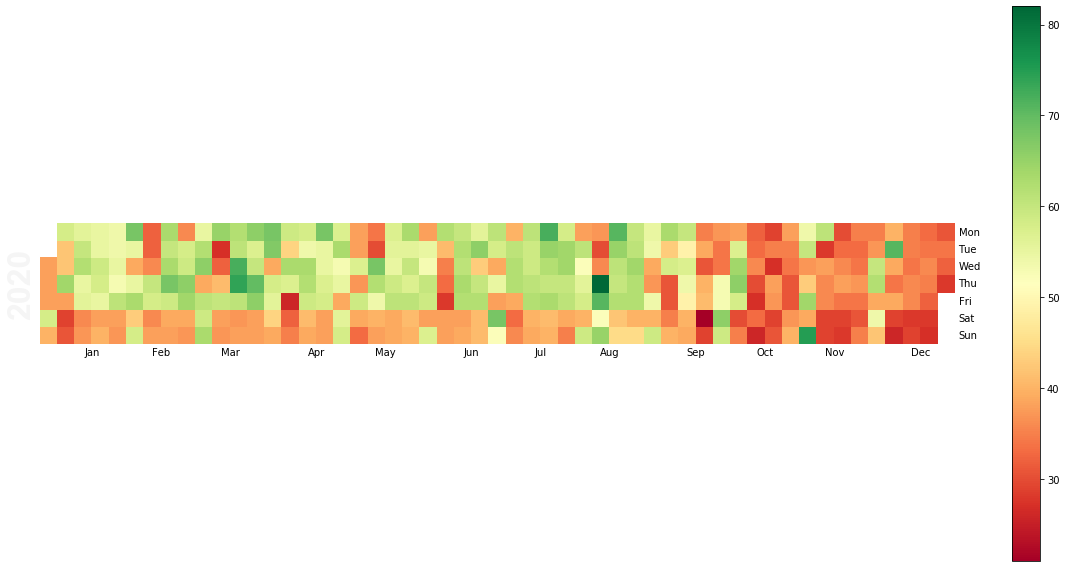

In [222]:
lenta.index = lenta.date
dayly_resampled_data = lenta.date.resample('D').count()
# тепловая карта активности по дням
import calmap

fig,ax=calmap.calendarplot(dayly_resampled_data,
                     linewidth=0,cmap='RdYlGn',
                    fig_kws=dict(figsize=(17,8)))

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

## Лайки

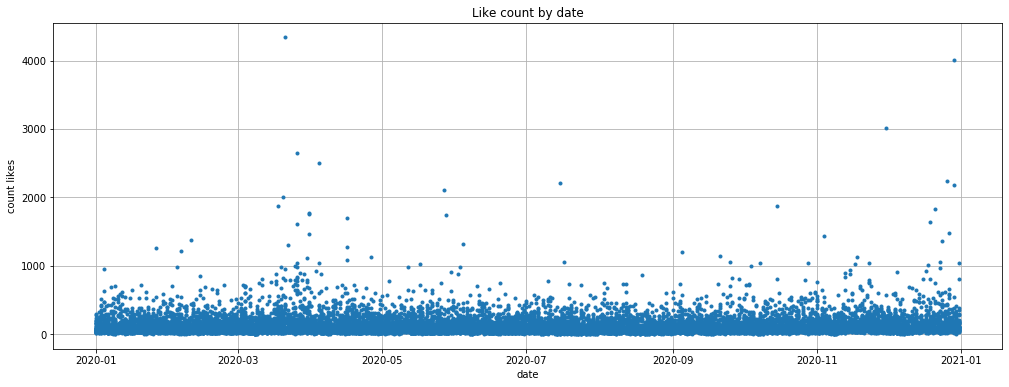

In [223]:
%matplotlib inline 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

like_lenta = lenta['likes']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('count likes') #подпись оси y
plt.grid()
plt.plot(like_lenta,'.') #что рисуем и в какой форме: точка и др.

In [232]:
like_lenta_n = lenta[lenta['likes'] < 2000 ]['likes'][0:5000] # задаем границу отсечения (боремся с выбросами, 
                                                             # которые "сплющивают" график)

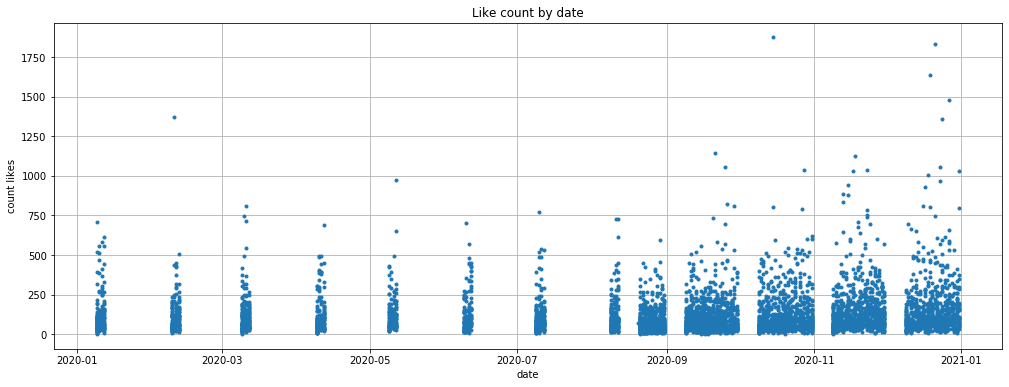

In [233]:
plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('count likes') #подпись оси y
plt.grid()
plt.plot(like_lenta_n,'.') #что рисуем и в какой форме: точка и др.

## Репосты 

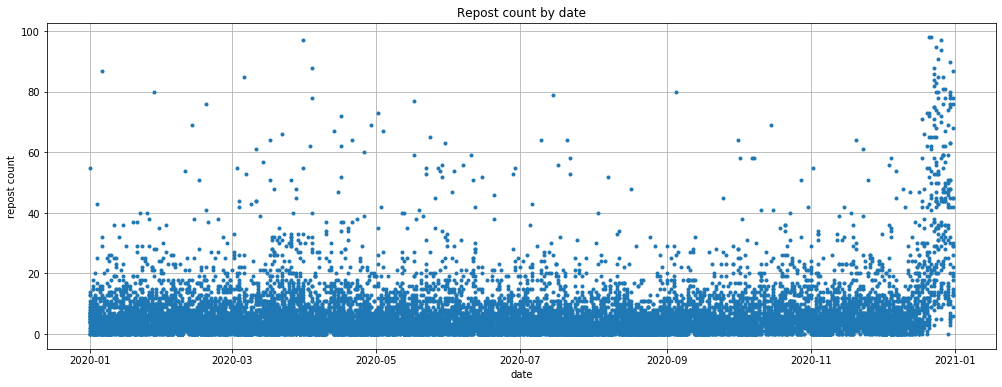

In [238]:
repost_lenta = lenta['reposts']
repost_lenta_n = lenta[lenta['reposts'] < 100 ]['reposts'] # граница отсечения выбрасов


plt.figure(num=1, figsize=(17, 6))
plt.title('Repost count by date')
plt.xlabel('date') 
plt.ylabel('repost count') 
plt.grid()
plt.plot(repost_lenta_n,'.')

## Комментарии

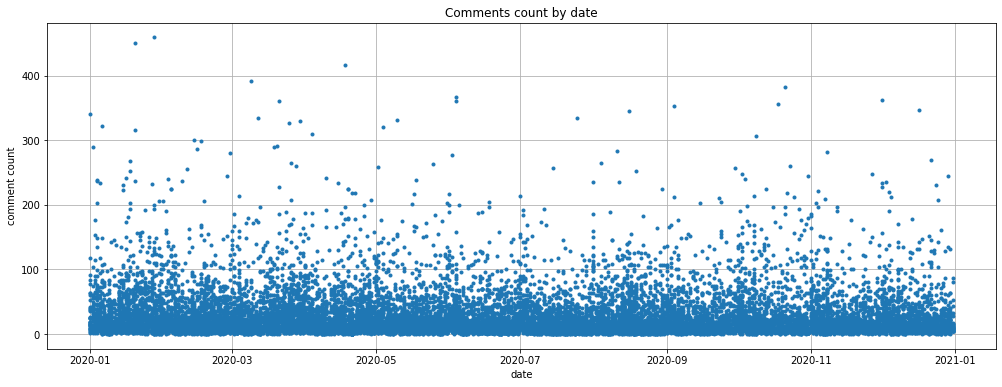

In [239]:
comment_lenta = lenta['comments']
comment_lenta_n = lenta[lenta['comments'] < 500 ]['comments'] # граница отсечения

plt.figure(num=1, figsize=(17, 6)) 

plt.title('Comments count by date')
plt.xlabel('date') 
plt.ylabel('comment count') 
plt.grid()
plt.plot(comment_lenta_n,'.')

## Отношение лайков к репостам 

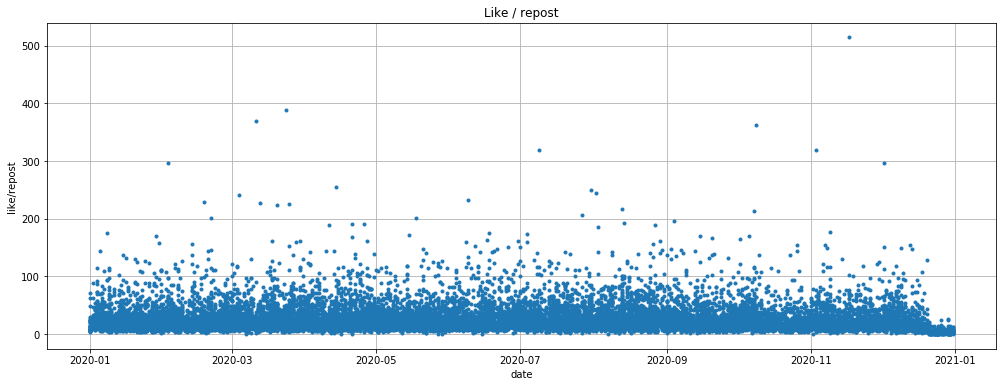

In [240]:
plt.figure(num=1, figsize=(17, 6)) 

plt.title('Like / repost')
plt.xlabel('date') 
plt.ylabel('like/repost') 
plt.grid()
plt.plot(like_lenta/repost_lenta,'.')

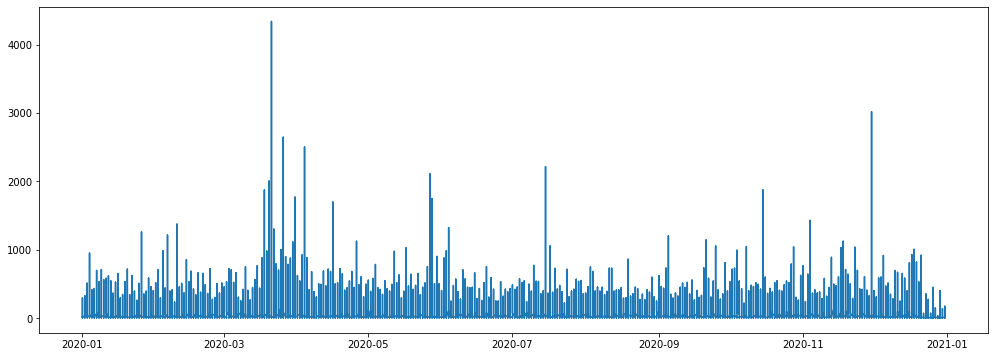

In [241]:
plt.figure(num=1, figsize=(17, 6)) 
plt.plot(like_lenta/repost_lenta [like_lenta/repost_lenta < 300],'-')

# Text Preprocessing

In [242]:
import pymorphy2
import re
from tqdm import tqdm_notebook
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models.word2vec import Word2Vec

In [243]:
# Предобработка текста 
morph = pymorphy2.MorphAnalyzer()

conv_pos = {'ADJF': 'ADJ', 'ADJS': 'ADJ', 'ADV': 'ADV', 'NOUN': 'NOUN', 'NUMR' : 'NUMR',
            'ADVB' : 'ADVB', 'PREP' : 'PREP', 'PRCL':'PREP', 'INTJ' : 'PREP',
            'VERB': 'VERB', 'PRTF': 'ADJ', 'PRTS': 'ADJ', 'GRND': 'VERB'}

conv_pos = {'ADJF': 'ADJ', 'ADJS': 'ADJ', 'ADV': 'ADV', 'NOUN': 'NOUN', 
            'ADVB' : 'ADVB', 
            'VERB': 'VERB', 'PRTF': 'ADJ', 'PRTS': 'ADJ', 'GRND': 'VERB'}

tmp_dict = {}  # Кеш значимых слов.
nones = {}  # Кеш незначимых слов.

# Фильтруем по части речи и возвращаем только начальную форму.


def normalizePymorphy_fast(text, need_pos=False):
    tokens = re.findall(
        '[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+|[0-9]+', text)
    with open("stopwords.txt", encoding="utf-8") as file:
        stop_words = file.read()
    words = []
    for t in tokens:
        #print(t)
        # Если токен уже был закеширован, быстро возьмем результат из него.
        if t in tmp_dict.keys():
            words.append(tmp_dict[t])
            # Аналогично, если он в кеше незначимых слов.
        elif t in nones.keys():
            pass
        # Слово еще не встретилось, будем проводить медленный морфологический анализ.
        else:
            pv = morph.parse(t)
            # if pv[0].tag.POS != None and pv[0].score >= 0.20:
            # if pv[0].tag.POS != None:
            # pv[0].normal_form not in stop_words
            # and pv[0].tag.POS in conv_pos.keys()
            # and pv[0].normal_form not in stop_words and pv[0].score >= 0.20
            if len(pv[0].normal_form) > 1 and pv[0].tag.POS in conv_pos.keys() and pv[0].normal_form not in stop_words:
                    # if pv[0].normal_form != 'быть' and \
                    # if pv[0].tag.POS in conv_pos.keys():
                if need_pos:
                    if 'NUMB' in pv[0].tag:
                        word = pv[0].normal_form+"_NUMB"
                        #print(word)
                    elif 'UNKN' in pv[0].tag:
                        word = pv[0].normal_form+"_UNKN"
                        #print(word)
                    else: 
                        word = pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS]
                        #print(word)
                else:
                    word = pv[0].normal_form
                # Отправляем слово в результат, ...
                words.append(word)
            # ... и кешируем результат его разбора.
                tmp_dict[t] = word
            else:
                # Для незначимых слов можно даже ничего не хранить. Лишь бы потом не обращаться к морфологии.
                nones[t] = ""

    return words

<>:20: DeprecationWarning: invalid escape sequence \-
<>:20: DeprecationWarning: invalid escape sequence \-
<>:20: DeprecationWarning: invalid escape sequence \-
<ipython-input-243-8a986ea2aae2>:20: DeprecationWarning: invalid escape sequence \-
  '[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+|[0-9]+', text)


In [245]:
lenta

,id,date,time,likes,reposts,views,comments,text,link,year
date,,,,,,,,,,
2020-12-31,4775042,2020-12-31,23:05,109,68,14673,5,"Знаете, как российская глубинка на Марсе отмет...",https://vk.com/wall-67991642_4775042,2020
2020-12-31,4775030,2020-12-31,22:21,69,30,13530,5,"Сколько времени понадобится котикам, чтобы сло...",https://vk.com/wall-67991642_4775030,2020
2020-12-31,4775019,2020-12-31,21:42,182,78,16905,6,"Вот у кого год точно прошёл хорошо, так это у ...",https://vk.com/wall-67991642_4775019,2020
2020-12-31,4775009,2020-12-31,21:02,31,6,10786,4,Уже успели подарить близким подарки? А вот рос...,https://vk.com/wall-67991642_4775009,2020
2020-12-31,4774998,2020-12-31,20:21,54,20,14186,5,"Пока мы думаем над лучшим мемом 2020-го, в Бол...",https://vk.com/wall-67991642_4774998,2020
...,...,...,...,...,...,...,...,...,...,...
2020-01-01,4216490,2020-01-01,03:41,53,10,21709,26,Центробанк начал взимать комиссию с банков за ...,https://vk.com/wall-67991642_4216490,2020
2020-01-01,4216460,2020-01-01,02:37,72,1,15744,9,Следующим соперником сборной России на молодеж...,https://vk.com/wall-67991642_4216460,2020
2020-01-01,4216409,2020-01-01,01:48,85,9,21741,64,"А вот и еще одна новость про повышение, только...",https://vk.com/wall-67991642_4216409,2020


In [247]:
lenta['Ntext'] = lenta['text'].map(lambda x:' '.join(normalizePymorphy_fast(str(x))))
len(tmp_dict.keys())

58473

### Word2Vec 

In [248]:
# Функции разбиения на предложения 
sentence_split_by_dot_pattern = r'(?<!\s\w\d\.)(?<!\w\.\w\.)(?<=[….?!])[\s+\n+]\s*(?=[\w\"\'«]|<\/?\s*p\s*>|-(?=\s*\w+))'
sentence_split_pattern = sentence_split_by_dot_pattern \
    + r'|(?<![….!?]\s<\/p>)[\s+\n+]\s*(?=<\s*p\s*>|<\s*br\s*\/?>)|[….?!](?=<\/?\s*p\s*>|<br\s*\/?>)'
word_split_pattern = r"(?P<word>(?:(?!_)(?:[\w/]|(?<=\w)[-'.](?=\w)))+)"
sentence_split_regexp = re.compile(sentence_split_pattern, flags=re.UNICODE)
word_split_regexp = re.compile(word_split_pattern, flags=re.UNICODE)


def split_text_into_part(text, part_regexp):
    return [text for i, text in
            enumerate(part_regexp.split(text))]


def split_text_into_sentences(text):
    return split_text_into_part(text, sentence_split_regexp)

In [249]:
# Предобработка текста по предложениям 
morph2 = pymorphy2.MorphAnalyzer()

conv_pos2 = {'ADJF': 'ADJ', 'ADJS': 'ADJ', 'ADV': 'ADV', 'NOUN': 'NOUN', 'NUMR' : 'NUMR',
            'ADVB' : 'ADVB', 'PREP' : 'PREP', 'PRCL':'PREP', 'INTJ' : 'PREP',
            'PRTF': 'ADJ', 'PRTS': 'ADJ', 'GRND': 'VERB'}

nones2 = {}  # Кеш незначимых слов.
tmp_dict2 = {}  # Кеш значимых слов.

# Фильтруем по части речи и возвращаем только начальную форму.


def normalizePymorphy_sentences(text, need_pos=False):
    output = []
    # Делим на предложения самым страшным из возможных образов.
    sentences = split_text_into_sentences(text)
    for sentence in sentences:
        #print(sentence)
        #print('\n-----')
        tokens = re.findall(
            '[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+|[0-9]+', sentence)
        with open("stopwords.txt", encoding="utf-8") as file:
            stop_words = file.read()
        words = []
        for t in tokens:
            #print(t)
            # Если токен уже был закеширован, быстро возьмем результат из него.
            if t in tmp_dict2.keys():
                words.append(tmp_dict2[t])
                # Аналогично, если он в кеше незначимых слов.
            elif t in nones2.keys():
                pass
            # Слово еще не встретилось, будем проводить медленный морфологический анализ.
            else:
                pv = morph2.parse(t)
                # if pv[0].tag.POS != None and pv[0].score >= 0.20:
                # if pv[0].tag.POS != None:
                # pv[0].normal_form not in stop_words and \
                #  and pv[0].normal_form not in stop_words
                if len(pv[0].normal_form) > 1 and pv[0].tag.POS in conv_pos2.keys():
                    # if pv[0].normal_form != 'быть' and \
                    # if pv[0].tag.POS in conv_pos.keys():
                    if need_pos:
                        if 'NUMB' in pv[0].tag:
                            word = pv[0].normal_form+"_NUMB"
                            #print(word)
                        elif 'UNKN' in pv[0].tag:
                            word = pv[0].normal_form+"_UNKN"
                            #print(word)
                        else: 
                            word = pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS]
                            #print(word)
                    else:
                        word = pv[0].normal_form
                        # Отправляем слово в результат, ...
                    words.append(word)
                    # ... и кешируем результат его разбора.
                    tmp_dict2[t] = word
#                 else:
#                     # Для незначимых слов можно даже ничего не хранить. Лишь бы потом не обращаться к морфологии.
#                     nones[t] = ""
        output.append(words)
        # Берем предложения не менее чем из 2 слов.
        output = [s for s in output if len(s) > 1]

    return output


<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<ipython-input-249-ff47ffd3d2b3>:22: DeprecationWarning: invalid escape sequence \-
  '[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+|[0-9]+', sentence)


In [250]:
def removeStopWords(text):
        return [word for word in text.split() if word not in stop_words_russian]

In [ ]:
# Предложения из всего набора данных 
all_sentences = []
#all_sentences_vis = [] #для визуализации (без стоп-слов)

for text in tqdm_notebook(meduza['text'].dropna()):
    if text == 0:
        continue
    all_sentences.extend(normalizePymorphy_sentences(text))
    #all_sentences_vis.extend(normalizePymorphy_sentences(str(removeStopWords(text))))

D:\myConda\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [92]:
phrases = Phrases(sentences=all_sentences, min_count=5, threshold=10)
bigram = Phraser(phrases)

for index, sentence in enumerate(all_sentences):
    all_sentences[index] = bigram[sentence]

In [95]:
num_features = 300
min_word_count = 4  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 8 # количество ядер процессора, чтоб запустить обучение в несколько потоков
context = 4        # размер окна
downsampling = 1e-3  # внутренняя метрика модели

w2v_model = Word2Vec(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling, sg=1)

In [96]:
import random
def shuffle_corpus(sentences):
    shuffled = list(sentences)
    random.shuffle(shuffled)
    return shuffled

In [97]:
w2v_model.build_vocab(sentences=shuffle_corpus(all_sentences), update=True)
w2v_model.train(sentences=shuffle_corpus(all_sentences),
                epochs=5, total_examples=w2v_model.corpus_count)

(329039, 412400)

In [98]:
w2v_model.init_sims(replace=True)
w2v_model.corpus_total_words

82480

In [99]:
list(w2v_model.wv.vocab)

['белоруссия',
 'освободить',
 'из-под',
 'стража',
 'директор',
 'академия',
 'гражданин_россия',
 'сергей',
 'адвокат_антон',
 'гашинский',
 'медуза',
 'президент',
 'россия_владимир',
 'путин',
 'новогодний',
 'обращение',
 'россиянин',
 'год',
 'груз',
 'несколько',
 'один',
 'житель',
 'камчатка',
 'автономный_округа',
 'где',
 'новый',
 'по',
 'москва',
 'московский_аэропорт',
 'половина',
 'день',
 'декабрь',
 'из-за',
 'прошедшее',
 'утром',
 'дождь',
 'задержать',
 'более',
 'сто',
 'рейс',
 'королева',
 'елизавета',
 'титул',
 'британский',
 'гонщик',
 'формула',
 'глава_чечня',
 'рамзан_кадыров',
 'ответственность_за',
 'терроризм',
 'родственник',
 'два',
 'застрелить',
 'грозный',
 'уроженец',
 'ингушетия',
 'это',
 'после_тот',
 'от',
 'доказательство',
 'тот',
 'убитый',
 'террорист',
 'бывший',
 'президент_украина',
 'пётр',
 'задержание',
 'боец_вагнер',
 'следствие',
 'спецоперация',
 'спецслужба',
 'который',
 'из',
 'россия',
 'на',
 'украина',
 'такой',
 'заявление

In [261]:
w2v_model.most_similar('конституция', topn=20)

D:\myConda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('изменение_конституция', 0.8939295411109924),
 ('закон_позволять', 0.890587568283081),
 ('политический_партия', 0.8840771913528442),
 ('внесение', 0.8784071207046509),
 ('направить_против', 0.8781922459602356),
 ('конституция_рф', 0.8750765323638916),
 ('судебный_реформа', 0.873170793056488),
 ('избирательный_законодательство', 0.872543454170227),
 ('присяга', 0.8703043460845947),
 ('против_принятие', 0.8679572343826294),
 ('принятие', 0.8656240105628967),
 ('вносить', 0.8656176328659058),
 ('давать', 0.8603230714797974),
 ('расширять', 0.8593246936798096),
 ('доработка', 0.8573004603385925),
 ('гарантия', 0.8571950197219849),
 ('внесение_изменение', 0.8567301034927368),
 ('палата_община', 0.8473315238952637),
 ('усиление', 0.8472885489463806),
 ('расширение', 0.8471341133117676)]

### LDA

In [262]:
from gensim import corpora, models
%matplotlib inline

In [264]:
# сохранение текста в формате gensim библиотеки (словарь-корпус)
dictionary = corpora.Dictionary([text.split(' ') for text in lenta['Ntext']])
dictionary.save('messages.dict')
corpus = [dictionary.doc2bow(text.split(' ')) for text in (lenta['Ntext'])]
corpora.MmCorpus.serialize('messages.mm', corpus)

In [265]:
n = 30
a = 0.8
LDA_model = models.ldamodel.LdaModel(corpus, num_topics=n, id2word=dictionary, alpha=a, random_state=0, passes=3)

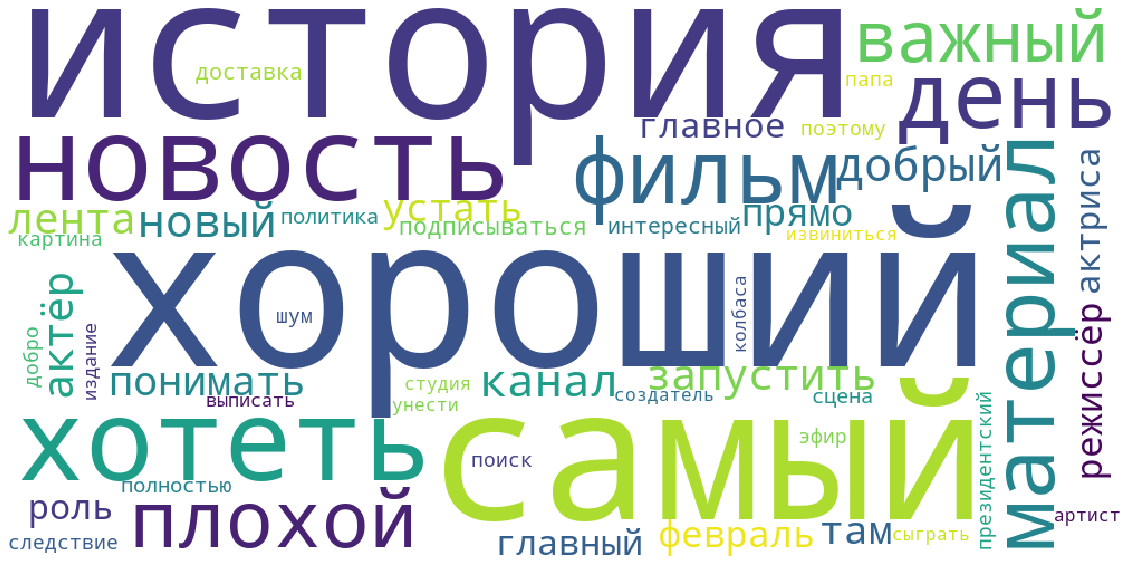

In [294]:
import wordcloud
NUM_CLASS = 19

words = LDA_model.show_topic(NUM_CLASS, 50)
wc = wordcloud.WordCloud(width=1000, height=500, margin=2, background_color='white')
wc.generate_from_frequencies({x: y for x,y in words})
plt.figure(figsize=(20, 16));
plt.imshow(wc);
plt.axis('off');
plt.show();

In [267]:
# топ тематик по 10 словам каждой темы
import networkx as nx
G = nx.Graph()
for i in range(n):
    topic_l = 'topic_' + str(i)
    terms = [t for t, v in LDA_model.show_topic(i, 10)]
    for term in terms:
        G.add_edge(topic_l, term)
pos = nx.spring_layout(G)

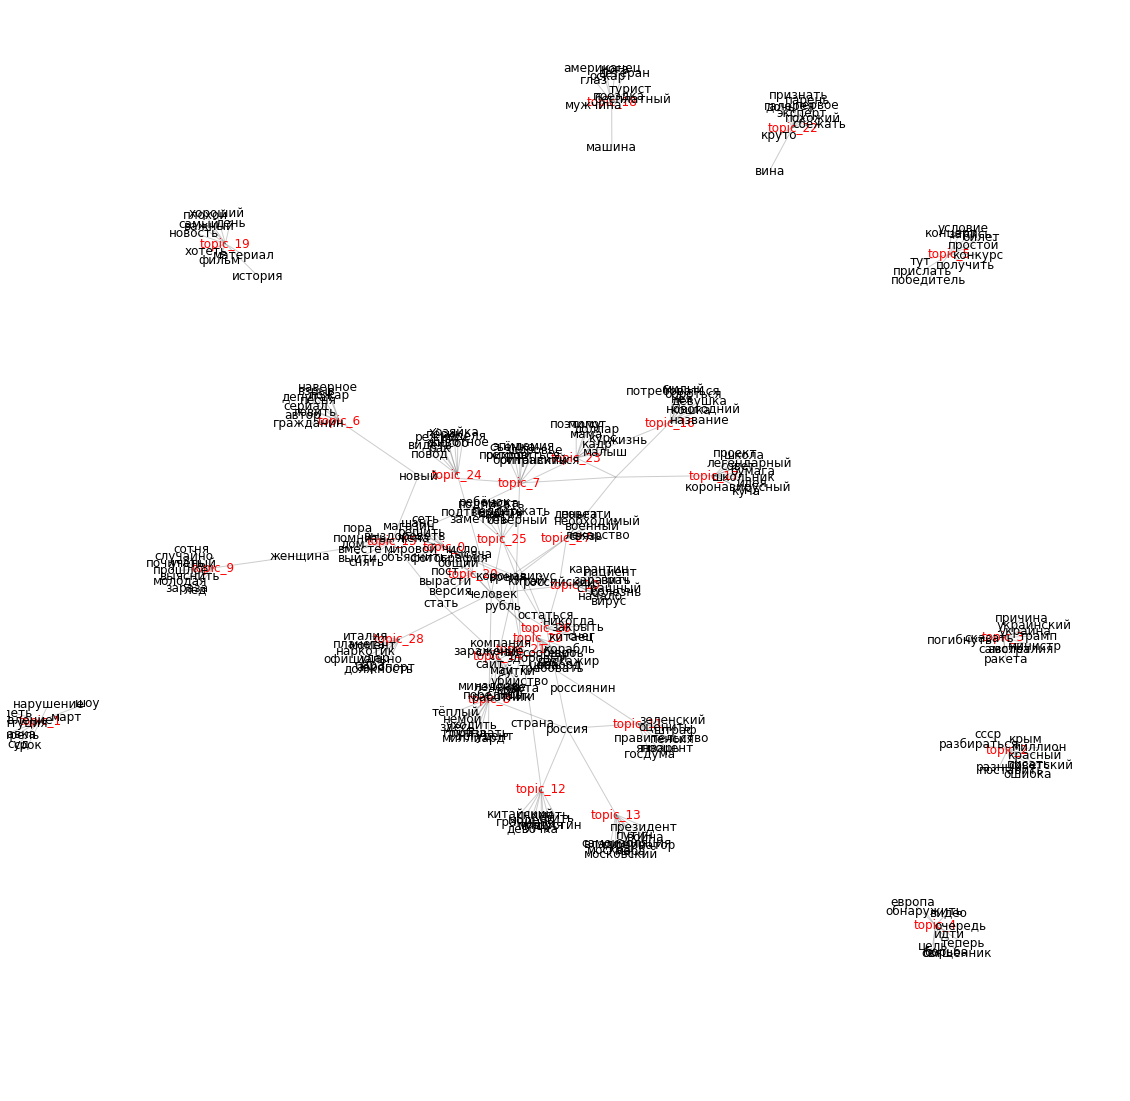

In [273]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
plt.figure(figsize=(20, 20));
f = G.subgraph([topic for topic,_ in pos.items() if 'topic_' in topic]);
nx.draw_networkx_labels(f, pos, font_color='r');
f = G.subgraph([topic for topic,_ in pos.items() if 'topic_' not in topic]);
nx.draw_networkx_labels(f, pos);
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), alpha=0.2);
plt.axis('off');
plt.ylim(-1, 1);
plt.xlim(-1, 1);

### Простая кластеризация 

In [275]:
import nltk
filtered_words = nltk.corpus.stopwords.words('russian') + nltk.corpus.stopwords.words('english')
with open('stopwords.txt','r',encoding='utf-8') as f: stop_words_russian = f.read()
stop_words_russian = stop_words_russian.split() + filtered_words
print('количество стоп-слов:',len(stop_words_russian))

количество стоп-слов: 774


In [277]:
# здесь будем пользовать тф-айдф
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import chain
from sklearn.preprocessing import normalize

tf_idf_vectorizor = TfidfVectorizer(stop_words=stop_words_russian)
tf_idf_vectorizor.fit(list(chain.from_iterable(all_sentences)))
tf_idf = tf_idf_vectorizor.fit_transform(lenta.Ntext)

tf_idf_norm = normalize(tf_idf, norm='l2')
tf_idf_array = tf_idf_norm.toarray()

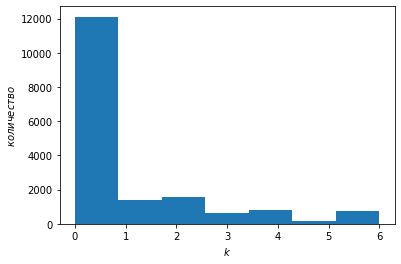

In [278]:
from sklearn.cluster import KMeans

k = 7
km = KMeans(n_clusters=k, random_state=1)
km.fit(tf_idf_array)
labels=km.labels_



plt.hist(km.labels_, bins=k);
plt.xlabel('$k$');
plt.ylabel('$количество$');
plt.show();

In [ ]:

km_cl=pd.DataFrame(list(zip(lenta['Ntext'],labels)),columns=['Ntext','cluster'])
km_cl.sort_values(by=['cluster'])
km_cl.groupby(['cluster']).count()
from sklearn import decomposition
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.metrics.pairwise import cosine_similarity


dist = 1 - cosine_similarity(tf_idf_array)

linkage_matrix = ward(dist)
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(linkage_matrix)


plt.figure(figsize=(15,7));
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=km.fit_predict(linkage_matrix), 
            edgecolor='none', alpha=0.7, s=80,
            cmap=plt.cm.get_cmap('nipy_spectral', 13));
plt.colorbar();

In [289]:
def get_top_features_cluster(array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        #features = w2v_model.wv.index2word
        features = tf_idf_vectorizor.get_feature_names()

        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


dfs = get_top_features_cluster(tf_idf_array, km.labels_, 15)

In [290]:
def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

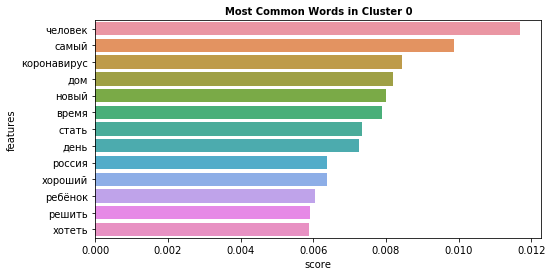

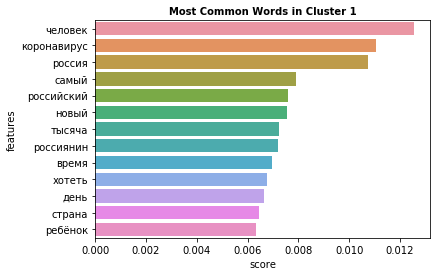

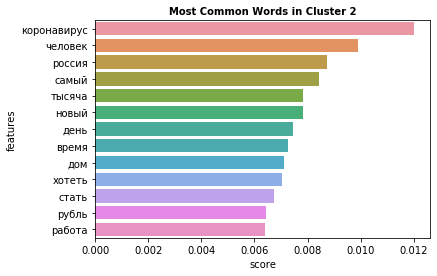

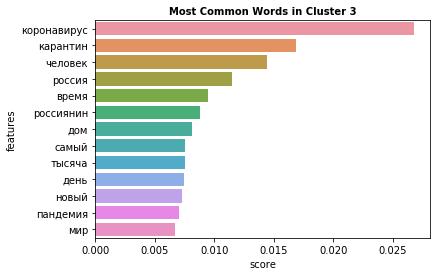

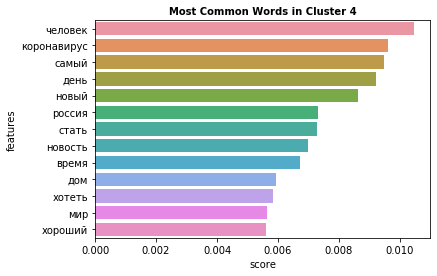

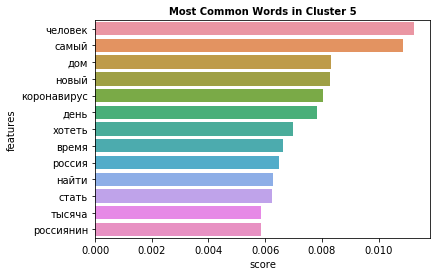

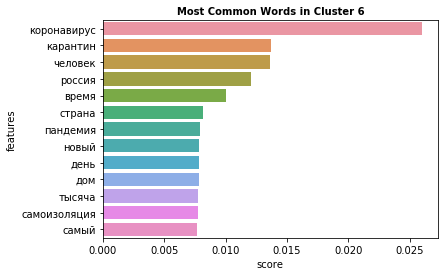

In [291]:
import seaborn as sns 
plotWords(dfs, 13)

### Тематическое моделирование 

In [280]:
# составление словаря 

words = corpora.Dictionary(all_sentences)
print('Размер словаря до фильтрации: {}'.format(len(words)))

Размер словаря до фильтрации: 30865


In [282]:
corpus = [words.doc2bow(doc) for doc in all_sentences]

In [284]:
np.random.seed(42)
ldamodel = models.ldamodel.LdaModel(
    corpus, 
    id2word=words, 
    eval_every=20, 
    num_topics=5, 
    passes=17
    )

In [286]:
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))


Perplexity:  -8.796744519310364


In [287]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=all_sentences, dictionary=words, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nСогласованность (Coherence Score): ', coherence_lda)


Согласованность (Coherence Score):  0.21795815104004457


In [288]:
#### import pyLDAvis
import pyLDAvis.gensim 

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, words, mds='mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.170319 -0.209306       1        1  23.632648
0     -0.052455  0.308128       2        1  23.438862
4     -0.149488 -0.267040       3        1  18.163603
3     -0.254471  0.047896       4        1  17.785316
1      0.286095  0.120322       5        1  16.979570, topic_info=           Term          Freq         Total Category  logprob  loglift
33           на  13556.000000  13556.000000  Default  30.0000  30.0000
327   ссылка_на   1813.000000   1813.000000  Default  29.0000  29.0000
126      москва   2791.000000   2791.000000  Default  28.0000  28.0000
256         суд   1593.000000   1593.000000  Default  27.0000  27.0000
130    источник   1093.000000   1093.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
333  информация    228.850830    525.692932   Topic5  -5.7450   0.9415
377        сайт    256.794342    920.530762   Topic5  -5.6298   0.4965
224         два    256.841370   1194.878906   Topic5  -5.6296   0.2358
20           по    327.908661   4980.235352   Topic5  -5.3853  -0.9473
22       россия    304.237091   3599.221680   Topic5  -5.4602  -0.6975

[303 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5470      4  0.988116  авария
3015      1  0.089819  август
3015      2  0.271498  август
3015      3  0.210258  август
3015      4  0.428681  август
...     ...       ...     ...
137       1  0.538083     это
137       3  0.004182     это
137       4  0.235586     это
137       5  0.221646     это
3539      5  0.995246  яндекс

[383 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 2])